Training on the dataset Titanic

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#importation du dataset avec Pandas
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


L'objectif de ce projet c'est faire des predictions de survie, on doit utiliser un algorithme de machine learning supervise pour entrainer notre model

In [16]:
#Etape de visualisation
df.info() ## Affiche les types de données et les valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dans cet partie on peut remarquer que la valeur 891 n'est pass commune dans tous les colonnes, ce qui signifie que, ceux qui n'ont pas la valeur 
commune a des valeurs manquantes.

In [17]:
df.describe()  # Statistiques descriptives
#les colonnes qui contiennent des valeurs categorielles n'apparaissent pas dans ce resultat
#Si on veut ajouter les colonnes nkon numeriques on ajoute (include = 'all') a l'interieur de describe
#df.describe(include = 'all')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


count :
Indique le nombre total de valeurs non nulles dans chaque colonne.
Permet de vérifier si une colonne contient des données manquantes.

mean (moyenne) :
La moyenne arithmétique des valeurs d'une colonne.
Donne une idée de la valeur centrale mais peut être influencée par les valeurs extrêmes (outliers).

std (écart-type) :
Mesure la dispersion des données autour de la moyenne.
Plus l'écart-type est élevé, plus les valeurs sont dispersées.

min :
La plus petite valeur présente dans la colonne.
Utile pour détecter des anomalies (exemple : des valeurs négatives inattendues).

25% (premier quartile ou Q1) :
Indique que 25 % des valeurs sont inférieures ou égales à cette valeur.
Utile pour repérer la limite basse des valeurs courantes.

50% (médiane) :
La valeur médiane : 50 % des données sont au-dessus et 50 % en dessous.
Insensible aux valeurs extrêmes, contrairement à la moyenne.

75% (troisième quartile ou Q3) :
Indique que 75 % des valeurs sont inférieures ou égales à cette valeur.
Permet de voir la limite haute des valeurs courantes.

max :
La plus grande valeur présente dans la colonne.
Utile pour détecter des anomalies ou des outliers.


Détection des valeurs extrêmes :
Comparez les valeurs de mean, min, et max pour repérer des outliers.


Si la moyenne (mean) est égale à la médiane (median), cela indique généralement que la distribution des données est symétrique. Voici les détails :

Interprétation
Symétrie des données :

Une égalité entre la moyenne et la médiane suggère que les valeurs sont réparties uniformément autour d'un point central.
Exemple typique : une distribution en forme de cloche comme la distribution normale.
Absence ou faible influence des outliers :

Dans une distribution symétrique, les valeurs extrêmes (outliers) sont équilibrées de part et d'autre de la médiane, ce qui maintient la moyenne proche de celle-ci.
Exemples de distributions où la moyenne ≈ médiane :
Distribution Normale :

Exemple : tailles humaines, erreurs expérimentales.
La courbe est symétrique, donc la moyenne = médiane = mode.
Distribution Uniforme Symétrique :

Exemple : valeurs aléatoires comprises entre 0 et 100.
Toutes les valeurs ont la même probabilité, donc les statistiques centrales coïncident.
Si ce n'est pas toujours vrai :
Si la moyenne n'est pas égale à la médiane, cela peut indiquer :

Distribution asymétrique (skewed) :

Skewness positive :
La queue de la distribution est étirée vers la droite (valeurs élevées).
La moyenne est alors supérieure à la médiane.
Exemple : revenus des ménages, où quelques valeurs très élevées tirent la moyenne vers le haut.
Skewness négative :
La queue de la distribution est étirée vers la gauche (valeurs basses).
La moyenne est alors inférieure à la médiane.
Exemple : notes d'examen où beaucoup d'étudiants réussissent mais peu échouent.
Présence d'outliers :

Les valeurs extrêmes influencent fortement la moyenne mais pas la médiane.

Lorsque vous identifiez des outliers ou que la moyenne est supérieure ou inférieure à la médiane (indiquant une asymétrie dans les données), voici les étapes à suivre pour analyser et traiter la situation efficacement :
1. Comprendre l'origine des outliers
Analyser les données :

Identifier les points aberrants en visualisant vos données (ex. : boîte à moustaches, histogrammes).
Rechercher les causes possibles : erreurs de saisie, problèmes de collecte, ou valeurs extrêmes mais légitimes.

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df['colonne_interessante'])
plt.sh

2. Vérifier l'impact des outliers
Les outliers peuvent fausser les résultats statistiques, surtout la moyenne et l'écart-type.
Utilisez des métriques robustes aux outliers comme la médiane, le MAD (Median Absolute Deviation), ou les quartiles pour avoir une meilleure idée de la distribution.

3. Prendre une décision sur les outliers
Voici les actions possibles, selon le contexte :

a. Conserver les outliers
Si les outliers sont légitimes et significatifs pour l'analyse (par exemple, revenus très élevés dans une analyse économique), gardez-les.
Vous pourriez segmenter vos données (par exemple, créer des catégories comme "valeurs normales" et "valeurs extrêmes").
b. Supprimer les outliers
Si les outliers résultent d'erreurs ou n'apportent pas de valeur analytique, vous pouvez les exclure.

Méthodes courantes :
Supprimer les valeurs en dehors de 1.5 fois l'écart interquartile (IQR) :oQ1 = df['colonne'].quantile(0.25)
Q3 = df['colonne'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df['colonne'] < (Q1 - 1.5 * IQR)) | (df['colonne'] > (Q3 + 1.5 * IQR)

Supprimer les valeurs au-delà de ±3 écarts-types )mean = df['colonne'].mean()
std = df['colonne'].std()
df_cleaned = df[(df['colonne'] >= mean - 3 * std) & (df['colonne'] <= mean + 3 * std)
c. Transformer les données
Appliquez une transformation pour réduire l'impact des outliers :
Logarithme : réduit les grandes valeurs disproportionnées
df['log_colonne'] = np.log1p(df['colonne'])
4. Gérer l’asymétrie entre moyenne et médiane
Distribution asymétrique (skewed) :

Si la moyenne est supérieure à la médiane (skewness positive) ou inférieure (skewness négative), envisagez des transformations pour normaliser les données, comme :
Logarithme.
Racine carrée.
Inverse.
Si les données restent asymétriques après transformation, utilisez des statistiques robustes comme la médiane ou les percentiles pour l’analyse.
]
)]
w()


<Axes: ylabel='Survived'>

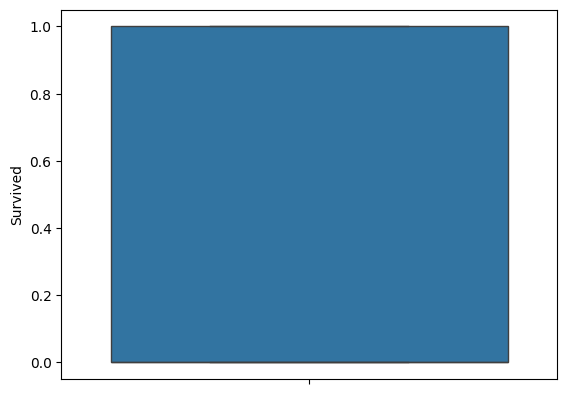

In [18]:
#puisque il y a un skewed positive ou la moyenne de la colonne survie est plus elevee que la moyenne on visualise un peu cette colonne pour comprendre mieux
sns.boxplot(data=df['Survived']) 
# plt.show()

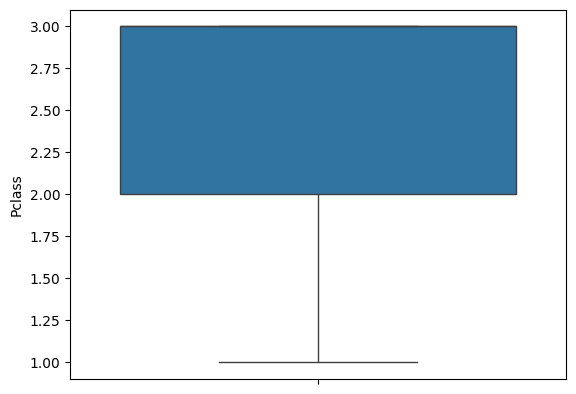

In [19]:
sns.boxplot(data=df['Pclass']) 
plt.show()

In [20]:
#on verifie le nombre d'invidu qu'il y a par classe
df['Pclass'].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

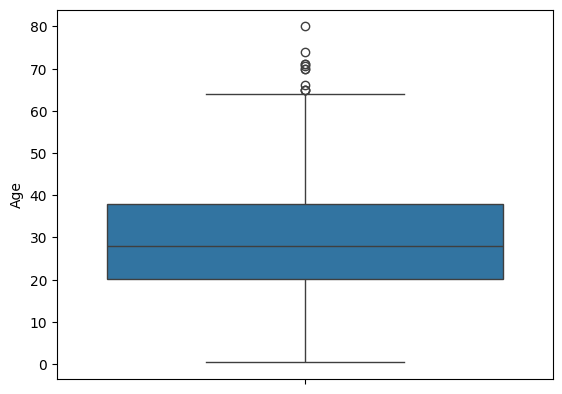

In [21]:
sns.boxplot(data=df['Age']) 
plt.show()

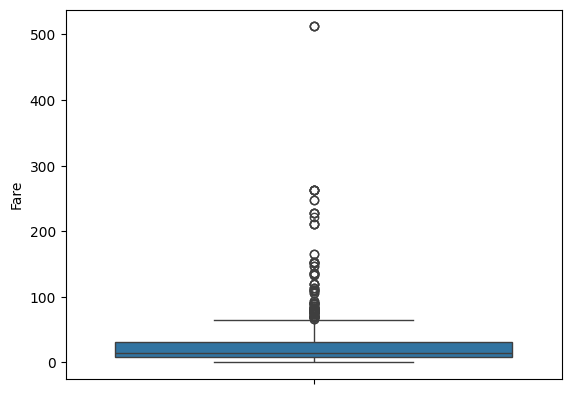

In [22]:
sns.boxplot(data=df['Fare']) 
plt.show()

In [23]:
# #supression des valeurs nulles
# df.dropna(inplace = True)


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df['Survived'].value_counts() #verifye s'il s'agit de variable categorielle ou pas

Survived
0    549
1    342
Name: count, dtype: int64

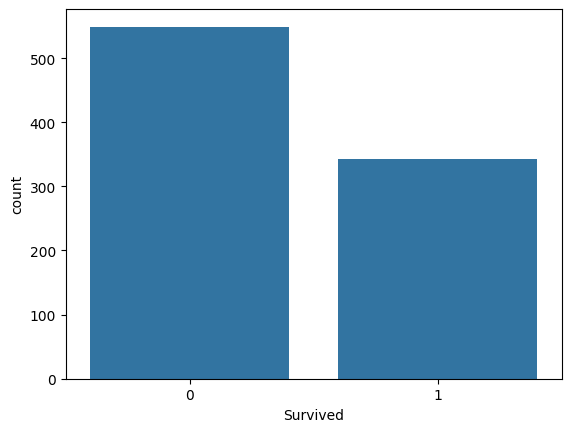

In [27]:
sns.countplot(x='Survived', data=df)  # Nombre de survivants vs non-survivants
plt.show()

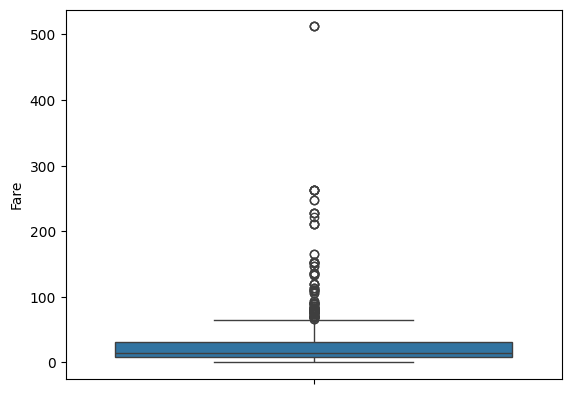

In [28]:
sns.boxplot(data = df['Fare'])
plt.show()

In [29]:
# Vérifiez les colonnes existantes
# print(df.columns)

# Supprimez uniquement les colonnes existantes
# cols_to_drop = ['PassengerId', 'Name', 'Ticket']
# df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Il faut savoir que les algorithmes de machine learning supervise ne fonctionne pas avec des valeurs non numeriques.
On doit appliquer le encodage binaire et le one hot encoding sur les colonnes en questions.
One hot encoding specailement pour pour la colonne Embarked, parce que il y a plusieur lettre on ne peut pas appliquer le encode binaire.

In [31]:
#verifye si gen vale ki manke
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [33]:
df['Age'].fillna(df['Age'].median(), inplace = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23672\3612560828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [34]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace =True)

df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})


df['Sex'].fillna(df['Sex'].median(), inplace =True)


df.drop("Cabin", axis=1, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23672\1521610626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace =True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_23672\1521610626.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [35]:
df.isnull().sum()*100/len(df)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [36]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

#one hot encoding
#df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [37]:
df['Age'] = df['Age'].astype('int') #Changer float en int
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22,1,0,7.2500,0
1,1,1,0.0,38,1,0,71.2833,1
2,1,3,0.0,26,0,0,7.9250,0
3,1,1,0.0,35,1,0,53.1000,0
4,0,3,1.0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27,0,0,13.0000,0
887,1,1,0.0,19,0,0,30.0000,0
888,0,3,0.0,28,1,2,23.4500,0
889,1,1,1.0,26,0,0,30.0000,1


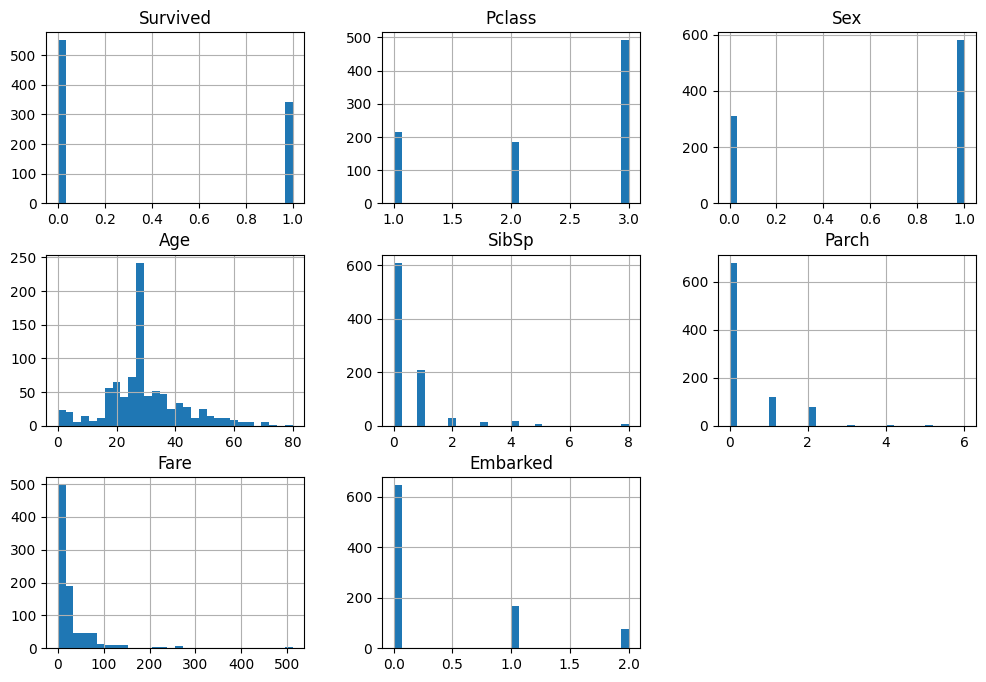

In [38]:
df.hist(figsize=(12, 8), bins=30)  # Histogrammes pour voir la distribution
plt.show()

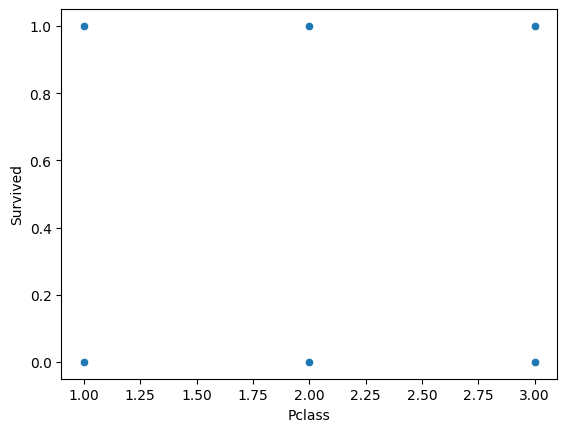

In [39]:
sns.scatterplot(x=df["Pclass"], y=df["Survived"])
#sns.scatterplot(x=df['Age'], y = df['Survived'])
plt.show()


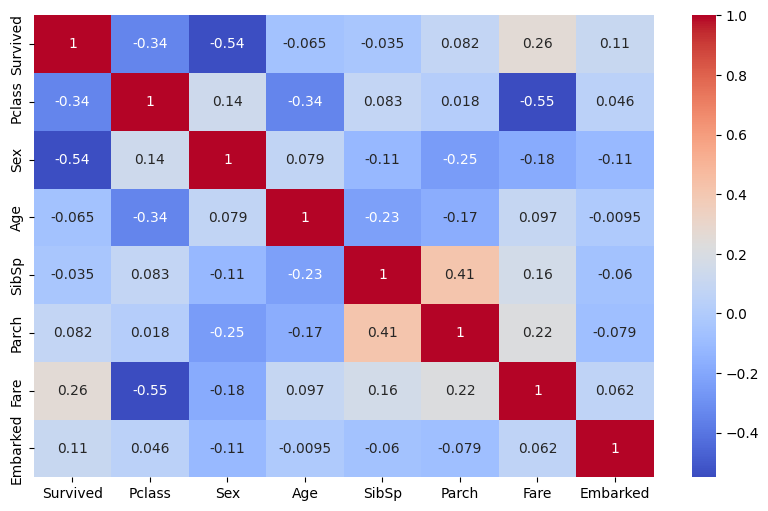

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [41]:
from sklearn.model_selection import train_test_split
#Division des donnees
X = df.drop('Survived', axis= 1)
y = df['Survived']
#Separation des donnees
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
#on choisit regression logistique parce qu'on un probleme de classification, on va predire si un passager survivre o pas au nofrage de titanic
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [45]:
#pediction
y_predict = model.predict(X_test)
#Nous utilisons X_test pour faire la prediction sur le modele

In [46]:
#On utilisera y_test pour evaluer le modele, pour voir si ce que le modele predire correspond vraiment a ceux du y_test
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [47]:
plt.figure(figsize = (25,5))


<Figure size 2500x500 with 0 Axes>

<Figure size 2500x500 with 0 Axes>

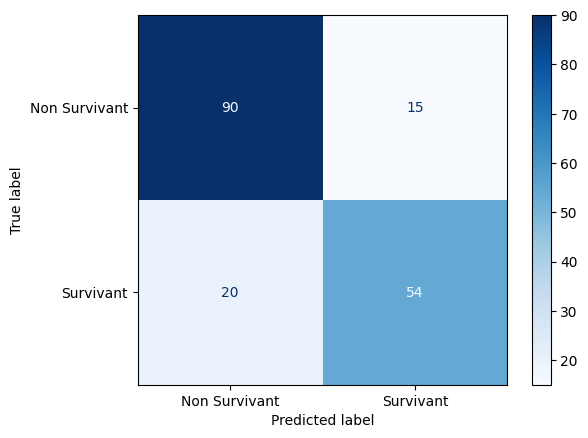

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_test : vraies valeurs
# y_pred : valeurs prédites par le modèle
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Survivant", "Survivant"])
disp.plot(cmap="Blues")


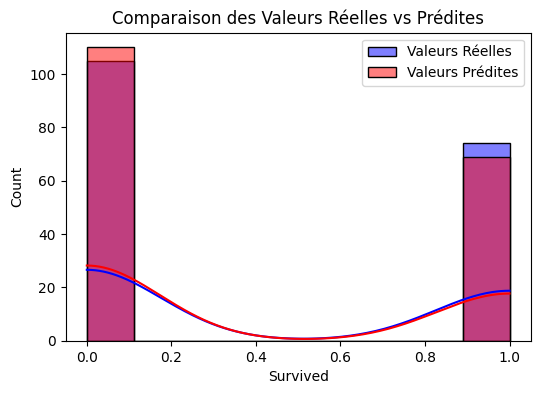

In [49]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(y_test, color="blue", label="Valeurs Réelles", kde=True)
sns.histplot(y_predict, color="red", label="Valeurs Prédites", kde=True)
plt.legend()
plt.title("Comparaison des Valeurs Réelles vs Prédites")
plt.show()


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = (90 + 54) / (90 + 54 + 15 + 20)  # (TP + TN) / Total
precision = 54 / (54 + 15)  # TP / (TP + FP)
recall = 54 / (54 + 20)  # TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)  # F1-score

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.80
Precision: 0.78
Recall: 0.73
F1 Score: 0.76


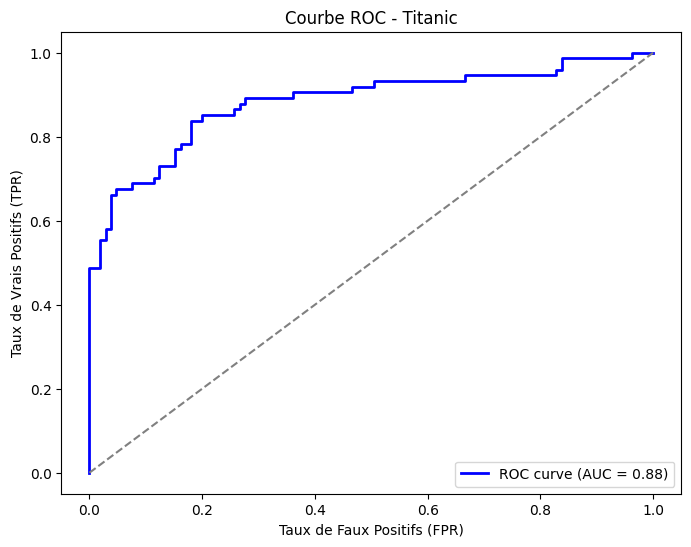

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilités prédites pour la classe "Survivant" (1)
y_proba = model.predict_proba(X_test)[:, 1]  # On prend la probabilité de la classe 1

# Calcul des valeurs pour la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)  # fpr = taux de faux positifs, tpr = taux de vrais positifs
roc_auc = auc(fpr, tpr)  # Calcul de l'AUC

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--")  # Ligne de référence
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Titanic")
plt.legend(loc="lower right")
plt.show()


Amelioration du modele

Pour ameliorer,on test d'autre modele ou modifier les hyperparametre du modele deja entraine

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [53]:
#on teste quatres modeles ensuite on choisira le modele le plus performant
models = { #Declaration d'un dictionnaire d'algorithme
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Entraînement et évaluation de chaque modèle
for name, model in models.items(): #on met name,modele in models.items pour que chaue modele est associe a son  nom
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}")

Logistic Regression - Accuracy: 0.80
Random Forest - Accuracy: 0.82
SVM - Accuracy: 0.65
KNN - Accuracy: 0.71


Maintenant on va optimiser les hyperparametres

on va utiliser GridsearchCV pour optimiser les parametres

In [54]:
from sklearn.model_selection import GridSearchCV

# Définition des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialisation du modèle
rf = RandomForestClassifier() #c'etait le meilleur modele

# Recherche des meilleurs paramètres
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy")
#Entrainement du modele avec les hyperparametres optimise
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)


Meilleurs paramètres: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


In [64]:
from sklearn.ensemble import RandomForestClassifier 
#re entrainement du model avec les meilleures parametres
best_param = grid_search.best_params_
final_rf =  RandomForestClassifier(**best_param, random_state = 42)
final_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=42)

In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#pediction
y_predict = final_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
confusion = confusion_matrix(y_test, y_predict)
classification = classification_report(y_test, y_predict)

print(f"Accuracy : {accuracy:.4f}")

print("Classification report :",classification)

print(f"Matrice de confusion : {confusion}")


Accuracy : 0.8380
Classification report :               precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

Matrice de confusion : [[96  9]
 [20 54]]


In [66]:
print(type(final_rf))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


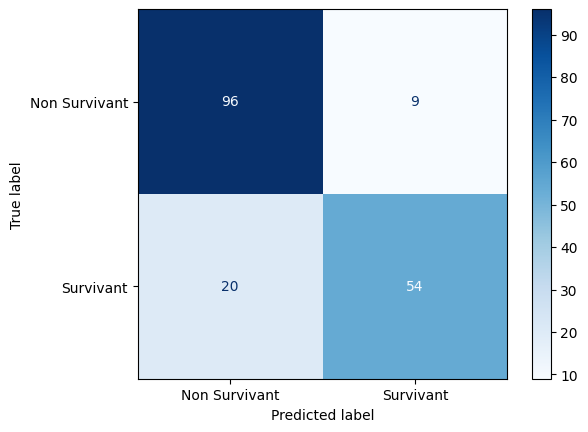

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_test : vraies valeurs
# y_pred : valeurs prédites par le modèle
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Survivant", "Survivant"])
disp.plot(cmap="Blues")


#Test avec nouveau dataset sur le model

In [70]:
import joblib

# Sauvegarder le modèle
joblib.dump(final_rf, 'modele.pkl')

# Charger le modèle plus tard
model = joblib.load('modele.pkl')
print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [73]:
import pickle

# Sauvegarder avec pickle
with open("Tmodele.pkl", "wb") as file:
    pickle.dump(final_rf, file)


In [59]:
new_data = pd.DataFrame([{"Pclass" : 3,	"Sex" : 1,	"Age" : 36,	"SibSp" : 1, "Parch" : 0,	"Fare" : 7.2500,	"Embarked" : 0}])
new_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,36,1,0,7.25,0


In [60]:
prediction = model.predict(new_data)
# Si vous avez besoin des probabilités (pour un modèle de classification)
probabilites = model.predict_proba(new_data)

In [61]:
print(f"Prédiction: {'Survivant' if prediction[0] == 1 else 'Non-Survivant'}")

Prédiction: Non-Survivant


In [62]:
print(probabilites)

[[0.89447902 0.10552098]]
